# The life of an athlete with type 1 diabetes: descriptives

Descriptives for the 2019 training season of 14 TNN athletes

In [1]:
import numpy as np
import pandas as pd
import datetime
import os
from copy import copy

from plot import *
from calc import glucose_levels, mmoll_mgdl, mgdl_mmoll, timestamp_to_seconds
from config import DATA_PATH

In [2]:
SAVE_PATH = 'results/'
if not os.path.exists(SAVE_PATH):
    os.makedirs(SAVE_PATH)

In [3]:
COL = 'Glucose Value (mg/dL)'
SECTIONS = ('wake', 'exercise', 'recovery', 'sleep')

### Read data

**Athlete characteristics**

In [4]:
info = pd.read_csv(DATA_PATH+'agg/info.csv')
info = info.reset_index()
info = info.rename(columns={'index':'RIDER'})
info

,RIDER,gender,nationality,age,diabetes_duration,weight,bf(%),HbA1c,FTP,LTHR,HRmax,VO2max,height
0,1,M,Switzerland,22,11,60.500000,9.066667,6.7,307.000000,176.333333,192.333333,68.888889,174.0
1,2,M,Italy,30,14,71.633333,8.833333,6.6,326.000000,168.666667,181.666667,66.915285,178.0
2,3,M,Ireland,26,7,66.733333,6.566667,6.8,298.000000,171.000000,180.000000,66.666164,171.0
3,4,M,Australia,19,7,78.666667,9.433333,7.8,356.000000,170.333333,187.333333,67.333333,178.0
4,5,M,Netherlands,25,6,69.633333,7.700000,6.5,341.000000,179.666667,192.666667,72.857143,183.0
5,6,M,Australia,20,9,56.700000,4.950000,6.4,298.500000,173.000000,184.500000,70.781588,169.0
6,7,M,Italy,22,6,65.333333,8.066667,5.9,298.500000,171.500000,180.500000,72.203125,167.0
7,8,M,New Zealand,20,17,65.000000,11.900000,7.7,292.000000,187.000000,204.000000,64.000000,165.0
8,9,M,France,23,10,63.100000,8.533333,7.2,278.666667,182.333333,195.000000,67.522310,173.0
9,10,M,UK,27,17,75.466667,7.700000,7.3,377.333333,177.000000,194.333333,73.982571,185.0


**Professional**

In [5]:
pro = pd.read_csv(DATA_PATH+'info/pro.csv')
pro = pro.sort_values('RIDER')

Select only people for whom we have *ethics*

In [6]:
pro = pro[pro.ethics == 1]
pro = pro.drop('ethics', axis=1)

# anonymize file
pro = pro.drop('name', axis=1)
pro['RIDER'] = pro['RIDER'].astype(int)
pro = pro.reset_index(drop=True)

pro

,RIDER,2014,2015,2016,2017,2018,2019,2020,2021
0,1,-,-,-,DEV,DEV,PRO,PRO,PRO
1,2,PRO,PRO,PRO,PRO,PRO,PRO,PRO,PRO
2,3,PRO,PRO,PRO,PRO,PRO,PRO,PRO,PRO
3,4,-,-,-,DEV,PRO,PRO,PRO,PRO
4,5,-,PRO,PRO,PRO,PRO,PRO,PRO,PRO
5,6,-,-,-,DEV,DEV,PRO,PRO,PRO
6,7,-,-,DEV,PRO,PRO,PRO,PRO,PRO
7,8,-,-,-,DEV,DEV,DEV,PRO,PRO
8,9,-,-,-,PRO,PRO,PRO,PRO,PRO
9,10,-,-,DEV,DEV,PRO,PRO,PRO,PRO


**Season dates**

In [7]:
season = pd.read_csv(DATA_PATH+'calendar/season_dates.csv', index_col=[0,1], header=[0,1])
season = season.reset_index().drop('level_1', axis=1)
season = season.rename(columns={'level_0':'RIDER'})
season

/local/home/evanweenen/.local/lib/python3.7/site-packages/pandas/core/generic.py:4150: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


RIDER        2015                    2016                    2017  \
               start         end       start         end       start   
0      1         NaN         NaN         NaN         NaN  2016-12-06   
1      2  2014-11-17  2015-10-18  2015-11-24  2016-10-28  2016-11-15   
2      3  2014-11-06  2015-10-18  2015-11-06  2016-10-23  2016-12-06   
3      4         NaN         NaN         NaN         NaN  2016-11-15   
4      5  2014-11-14  2015-11-08  2015-11-27  2016-10-30  2016-11-12   
5      6         NaN         NaN         NaN         NaN  2016-12-12   
6      7         NaN         NaN  2015-10-07  2016-04-16  2016-11-07   
7      8         NaN         NaN         NaN         NaN  2016-12-14   
8      9         NaN         NaN         NaN         NaN  2016-12-06   
9     10         NaN         NaN  2015-11-06  2016-10-17  2016-11-04   
10    11  2014-11-02  2015-11-12  2015-12-01  2016-11-12  2016-12-07   
11    12  2014-11-15  2015-10-29  2015-11-24  2016-10-22  2016-11-07   
12    13         NaN         NaN         NaN         NaN         NaN   
13    14  2014-11-14  2015-10-25  2015-12-02  2016-10-30  2016-11-13   
14    15  2014-11-17  2015-10-18  2015-11-12  2016-10-23  2016-11-14   
15    16         NaN         NaN         NaN         NaN  2016-12-14   
16    17         NaN         NaN         NaN         NaN         NaN   
17    18         NaN         NaN         NaN         NaN  2016-12-13   

                      2018                    2019                    2020  \
           end       start         end       start         end       start   
0   2017-11-05  2017-11-13  2018-10-20  2018-11-05  2019-10-20  2019-11-04   
1   2017-09-11  2017-10-23  2018-10-02  2018-10-23  2019-10-16  2019-11-04   
2   2017-10-05  2017-11-13  2018-10-31  2018-11-19  2019-10-20  2019-11-13   
3   2017-09-30  2017-10-05  2018-11-01  2018-11-12  2019-10-16  2019-11-04   
4   2017-09-23  2017-10-03  2018-10-17  2018-11-12  2019-10-20  2019-11-11   
5   2017-10-14  2017-10-30  2018-10-25  2018-12-01  2019-10-01  2019-10-21   
6   2017-11-05  2017-11-28  2018-10-17  2018-11-29  2019-10-27  2019-12-02   
7   2017-11-05  2017-11-19  2018-12-12  2018-12-24  2019-10-16  2019-10-24   
8   2017-11-05  2017-11-20  2018-09-24  2018-11-05  2019-09-23  2019-10-14   
9   2017-11-12  2017-11-27  2018-11-10  2018-11-22  2019-10-28  2019-11-11   
10  2017-10-22         NaN         NaN  2018-10-15  2019-06-23  2019-10-23   
11  2017-10-31  2017-11-06  2018-11-11  2018-11-26  2019-11-05  2019-11-18   
12         NaN         NaN         NaN  2018-12-12  2019-10-20  2019-11-18   
13  2017-11-20  2017-12-21  2018-11-01  2018-11-12  2019-09-09  2019-10-21   
14  2017-11-01  2017-11-27  2018-10-21  2018-11-12  2019-10-20  2019-11-09   
15  2017-09-10  2017-11-21  2018-11-02  2018-11-19  2019-09-29  2019-11-14   
16         NaN         NaN         NaN         NaN         NaN         NaN   
17  2017-10-22  2017-11-20  2018-08-12  2018-10-22  2019-10-13  2019-11-09   

                      2021              
           end       start         end  
0   2020-09-23  2020-10-08  2021-10-30  
1   2020-10-11  2020-11-09  2021-10-04  
2   2020-10-16  2020-11-16  2021-10-03  
3   2020-10-28  2020-11-16  2021-08-14  
4   2020-10-31  2020-11-16  2021-08-31  
5   2020-07-17  2020-11-01  2021-09-03  
6   2020-10-12  2020-11-09  2021-09-30  
7   2020-09-27  2020-11-01  2021-10-03  
8   2020-10-12  2020-11-05  2021-10-01  
9   2020-10-11  2020-11-16  2021-10-17  
10  2020-10-02  2020-11-01  2021-09-17  
11  2020-10-08  2020-11-01  2021-09-03  
12  2020-10-11  2020-11-16  2021-09-05  
13  2020-10-12  2020-11-02  2021-09-20  
14  2020-10-15  2020-11-07  2021-10-29  
15  2020-10-31  2020-11-23  2021-09-30  
16         NaN         NaN         NaN  
17  2020-10-18  2020-11-11  2021-10-05

**TrainingPeaks (aggregated)**

In [8]:
tp_agg = pd.read_csv(DATA_PATH+'agg/trainingpeaks_day.csv', index_col=[0,1], header=[0,1])
tp_agg = tp_agg.reset_index()
tp_agg['date'] = pd.to_datetime(tp_agg['date'])
tp_agg

RIDER       date            TIME                       \
                       timestamp_count  local_timestamp_min   
0         1 2016-11-22          7446.0  2016-11-22 12:58:57   
1         1 2016-11-23          7312.0  2016-11-23 14:29:13   
2         1 2016-11-24          6285.0  2016-11-24 09:53:38   
3         1 2016-11-26          7445.0  2016-11-26 10:00:35   
4         1 2016-12-06         11222.0  2016-12-06 09:11:34   
...     ...        ...             ...                  ...   
30208    18 2021-11-18          4767.0  2021-11-18 14:58:17   
30209    18 2021-11-25         10912.0  2021-11-25 09:50:57   
30210    18 2021-11-26          8737.0  2021-11-26 10:12:34   
30211    18 2021-11-27         18222.0  2021-11-27 09:31:58   
30212    18 2021-11-28         14549.0  2021-11-28 10:02:22   

                           CALENDAR                                   \
       local_timestamp_max     race travel race_3d_mean race_7d_mean   
0      2016-11-22 15:15:40    False   True          0.0          0.0   
1      2016-11-23 16:35:14    False  False          0.0          0.0   
2      2016-11-24 16:56:38    False  False          0.0          0.0   
3      2016-11-26 12:12:52    False  False          0.0          0.0   
4      2016-12-06 16:11:38    False  False          0.0          0.0   
...                    ...      ...    ...          ...          ...   
30208  2021-11-18 16:19:15    False  False          0.0          0.0   
30209  2021-11-25 12:54:14    False  False          0.0          0.0   
30210  2021-11-26 12:39:08    False  False          0.0          0.0   
30211  2021-11-27 14:36:43    False  False          0.0          0.0   
30212  2021-11-28 14:21:57    False  False          0.0          0.0   

                     ...          LOC                             \
      travel_3d_any  ... distance_min distance_max  distance_sum   
0              True  ...         3.02     60211.87  2.176246e+08   
1              True  ...         0.00     66126.45  2.425919e+08   
2              True  ...         3.43     34317.18  1.010690e+08   
3             False  ...         1.10     65340.95  2.508262e+08   
4             False  ...         0.00     64799.24  2.959160e+08   
...             ...  ...          ...          ...           ...   
30208         False  ...         0.00     29709.74  6.085284e+07   
30209         False  ...         0.00     80574.10  4.163251e+08   
30210         False  ...         0.00     62597.98  2.700624e+08   
30211         False  ...         0.00    130010.95  1.110585e+09   
30212         False  ...         3.57    109086.89  8.207432e+08   

                                                                 \
      distance_energy distance_peaks  distance_rms distance_iqr   
0        8.726028e+12            0.0  34233.144437   31096.1225   
1        1.076261e+13            0.0  38365.484707   33609.8750   
2        2.181329e+12            1.0  18629.789432          NaN   
3        1.112146e+13            0.0  38649.918715   32615.2600   
4        1.209650e+13            1.0  32831.808756   34073.7050   
...               ...            ...           ...          ...   
30208    1.271899e+12            0.0  16334.420219          NaN   
30209    2.158806e+13            0.0  44478.959811          NaN   
30210    1.147066e+13            0.0  36233.729380          NaN   
30211    9.500620e+13            0.0  72206.776484   66054.0525   
30212    6.213176e+13            0.0  65349.195666   59253.8200   

                                                           
      distance_up_iqr acceleration_iqr elevation_gain_iqr  
0                 NaN              NaN                NaN  
1                 NaN              NaN                NaN  
2                 NaN              NaN                NaN  
3                 NaN              NaN                NaN  
4                 NaN              NaN                NaN  
...               ...              ...                ...  
30208       

**Dexcom (aggregated)**

In [9]:
dc_agg = pd.read_csv(DATA_PATH+'agg/dexcom_day.csv')
dc_agg['date'] = pd.to_datetime(dc_agg['date'])
dc_agg

/local/home/evanweenen/.local/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3147: DtypeWarning: Columns (73,74) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,RIDER,date,time_in_hypo_exercise,time_in_hypoL2_exercise,time_in_hypoL1_exercise,time_in_target_exercise,time_in_hyper_exercise,time_in_hyperL1_exercise,time_in_hyperL2_exercise,glucose_mean_exercise,...,glucose_std_14d,glucose_cv_14d,glucose_rate_14d,completeness_14d,count_14d,LBGI_14d,HBGI_14d,AUC_14d,hypo_14d,hyper_14d
0,1,2013-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.0,0,0.0,0.0,NaN,False,False
1,1,2014-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.0,0,0.0,0.0,NaN,False,False
2,1,2014-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.0,0,0.0,0.0,NaN,False,False
3,1,2014-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.0,0,0.0,0.0,NaN,False,False
4,1,2014-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.0,0,0.0,0.0,NaN,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52610,18,2021-12-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.0,0,0.0,0.0,NaN,False,False
52611,18,2021-12-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.0,0,0.0,0.0,NaN,False,False
52612,18,2021-12-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.0,0,0.0,0.0,NaN,False,False
52613,18,2021-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.0,0,0.0,0.0,NaN,False,False


In [10]:
print("Data available: ")
print("TrainingPeaks: N =", len(tp_agg.RIDER.unique()), "; D =", len(tp_agg))
print("Dexcom: N =", len(dc_agg.dropna(subset=['glucose_mean_1d']).RIDER.unique()), 
      "; D =", len(dc_agg.dropna(subset=['glucose_mean_1d'])))

Data available: 
TrainingPeaks: N = 18 ; D = 30213
Dexcom: N = 18 ; D = 11786


### Select data

Select riders that were pro in 2019

In [11]:
ATHLETES = pro.loc[pro['2019'] == 'PRO', 'RIDER'].to_list()

In [12]:
info = info[info.RIDER.isin(ATHLETES)].set_index('RIDER')
season = season[season.RIDER.isin(ATHLETES)].set_index('RIDER')

In [13]:
print("Data available: ")
print("TrainingPeaks: N =", len(tp_agg[tp_agg.RIDER.isin(ATHLETES)].RIDER.unique()), 
      "; D =", len(tp_agg[tp_agg.RIDER.isin(ATHLETES)]))
print("Dexcom: N =", len(dc_agg[dc_agg['glucose_mean_1d'].notna() & dc_agg.RIDER.isin(ATHLETES)].RIDER.unique()), 
      "; D =", len(dc_agg[dc_agg['glucose_mean_1d'].notna() & dc_agg.RIDER.isin(ATHLETES)]))

Data available: 
TrainingPeaks: N = 14 ; D = 25116
Dexcom: N = 14 ; D = 9229


Select beginning and end of the training season in 2019

In [14]:
season = season['2019']

season['start'] = pd.to_datetime(season['start'])
season['end'] = pd.to_datetime(season['end'])

season_list = season.apply(lambda x: pd.date_range(x[0], x[1], freq='1D'), axis=1)\
    .apply(pd.Series).stack().reset_index().drop('level_1', axis=1).rename(columns={0:'date'})

tp_agg = pd.merge(tp_agg, season_list, how='right', on=['RIDER', 'date'])

dc_agg = pd.merge(dc_agg, season_list, how='right', on=['RIDER', 'date'])

/local/home/evanweenen/.local/lib/python3.7/site-packages/pandas/core/reshape/merge.py:648: UserWarning: merging between different levels can give an unintended result (2 levels on the left,1 on the right)
  warnings.warn(msg, UserWarning)


In [15]:
print("Data available: ")
print("TrainingPeaks: N =", len(tp_agg.dropna(subset=[('TIME', 'local_timestamp_min')]).RIDER.unique()), 
      "; D =", len(tp_agg.dropna(subset=[('TIME', 'local_timestamp_min')])))
print("Dexcom: N =", len(dc_agg.dropna(subset=['glucose_mean_1d']).RIDER.unique()), 
      "; D =", len(dc_agg.dropna(subset=['glucose_mean_1d'])))

Data available: 
TrainingPeaks: N = 14 ; D = 3828
Dexcom: N = 14 ; D = 3060


Select data with glucose completeness >= 70% and remove nans from dexcom data

In [16]:
dc_agg = dc_agg[dc_agg['completeness_1d'] >= 0.7]

In [17]:
print("Data available: ")
print("TrainingPeaks: N =", len(tp_agg.dropna(subset=[('TIME', 'local_timestamp_min')]).RIDER.unique()), 
      "; D =", len(tp_agg.dropna(subset=[('TIME', 'local_timestamp_min')])))
print("Dexcom: N =", len(dc_agg.dropna(subset=['glucose_mean_1d']).RIDER.unique()), 
      "; D =", len(dc_agg.dropna(subset=['glucose_mean_1d'])))

Data available: 
TrainingPeaks: N = 14 ; D = 3828
Dexcom: N = 14 ; D = 2120


### Prepare features

Glucose data preparation

In [18]:
dc_agg = dc_agg.set_index(['RIDER', 'date'])

col_mask = dc_agg.columns.str.startswith('hypo') |  dc_agg.columns.str.startswith('hyper')
dc_agg.loc[:, col_mask] = dc_agg.loc[:, col_mask].astype('category')

TrainingPeaks data preparation

In [19]:
# TODO: count is not exactly duration (because we only count when there's a measurement)

# prepare time features
tp_agg[('TIME', 'time_start')] = timestamp_to_seconds(tp_agg[('TIME', 'local_timestamp_min')])
tp_agg[('TIME', 'time_end')] = timestamp_to_seconds(tp_agg[('TIME', 'local_timestamp_max')])
tp_agg = tp_agg.drop([('TIME', 'local_timestamp_min'),
                      ('TIME', 'local_timestamp_max')], axis=1)
tp_agg = tp_agg.rename(columns={'timestamp_count':'duration'})

# get day in season
season_list['day_in_season'] = season_list.groupby('RIDER')['date'].transform(lambda x: x - x.min()).dt.days
season_list.columns = pd.MultiIndex.from_tuples([('RIDER', ''), ('date', ''), ('TIME', 'day_in_season')])
tp_agg = pd.merge(tp_agg, season_list, how='left', on=['RIDER', 'date'])

# calculate percentage in zones
cols_zones = [('POWER', 'time_in_power_zone%s'%n) for n in range(1,7)] + [('HR', 'time_in_hr_zone%s'%n) for n in range(1,6)]
tp_agg[[(mod, 'perc'+c.lstrip('time')) for (mod, c) in cols_zones]] = tp_agg[cols_zones].apply(lambda col: col.divide(tp_agg[('TIME', 'duration')]))
tp_agg = tp_agg.drop(cols_zones, axis=1)

# rename
tp_agg = tp_agg.rename(columns={'chronic_training_load'  :'fitness', 
                                'acute_training_load'    :'fatigue', 
                                'training_stress_balance':'form'})

cols_cat = [('CALENDAR', 'race'), ('CALENDAR', 'travel'),
            ('CALENDAR', 'travel_3d_any'), ('CALENDAR', 'travel_7d_any')]
tp_agg[cols_cat] = tp_agg[cols_cat].astype('category')

# replace np.inf
tp_agg = tp_agg.replace({np.inf:np.nan})

# replace 0s to nan (due to aggregation: TODO: fix in aggregate_trainingpeaks.py)
tp_agg.loc[tp_agg[('HR', 'heart_rate_mean')] == 0, tp_agg.columns.get_level_values(0) == 'HR'] = np.nan
tp_agg.loc[tp_agg[('POWER', 'power_mean')] == 0, tp_agg.columns.get_level_values(0) == 'POWER'] = np.nan
for col in ('acceleration', 'speed', 'distance', 'elevation_gain', 'grade'):
    tp_agg.loc[(tp_agg[('LOC', col+'_mean')] == 0) & (tp_agg[('LOC', col+'_std')] == 0),
        tp_agg.columns.get_level_values(1).str.startswith(col)] = np.nan
for col in ('cadence', 'left_pedal_smoothness', 'right_pedal_smoothness', 'combined_pedal_smoothness',
           'left_torque_effectiveness', 'right_torque_effectiveness', 'left_right_balance'):
    tp_agg.loc[(tp_agg[('POWER', col+'_mean')] == 0) & (tp_agg[('POWER', col+'_std')] == 0),
        tp_agg.columns.get_level_values(1).str.startswith(col)] = np.nan

/local/home/evanweenen/.local/lib/python3.7/site-packages/pandas/core/generic.py:4150: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


Replace extreme values

In [20]:
from scipy.stats import zscore

def clip_extremes(df, z_max=3, **kwargs):
    """
    Clip extreme values: when values exceed z_max, replace with mu+-z_max*std
    """
    z = zscore(df, **kwargs)
    mu = df.mean() 
    sigma = df.std()
    df = df.mask(z > z_max, mu + z_max*sigma)
    df = df.mask(z < -z_max, mu - z_max*sigma)
    return df
    
# note: we do not winsorize as that is based on percentiles, rather clip based on std
cols_extreme = tp_agg.set_index(['RIDER', 'date']).columns.drop(cols_cat).drop([('CALENDAR', 'race_3d_mean'), 
                                                                                ('CALENDAR', 'race_7d_mean')])
z = np.abs(zscore(tp_agg[cols_extreme], nan_policy='omit'))
print("Percentage of extreme values in data: {:.2f}%".format(
    (z > 3).sum().sum() / tp_agg[cols_extreme].count().sum() * 100))
for col in cols_extreme:
    tp_agg[col] = clip_extremes(tp_agg[col], nan_policy='omit')

Percentage of extreme values in data: 1.03%


Select only features that we think are relevant for this analysis

In [21]:
cols_select = [ ('TIME', 'duration'),
                ('TIME', 'time_start'),
                ('TIME', 'time_end'),#remove

                ('CALENDAR', 'travel_7d_any'),#remove
                ('CALENDAR', 'travel_3d_any'),
                ('CALENDAR', 'travel'),#remove
                ('CALENDAR', 'race'),
                ('CALENDAR', 'country_carbs'),

                ('HR', 'perc_in_hr_zone1'),
                ('HR', 'perc_in_hr_zone2'),
                ('HR', 'perc_in_hr_zone3'),
                ('HR', 'perc_in_hr_zone4'),
                ('HR', 'perc_in_hr_zone5'),

                #('POWER', 'training_stress_score'),
                ('POWER', 'fitness'), # remove 
                #('POWER', 'fatigue'),
                ('POWER', 'form'), # remove because = fitness - fatigue
                ('POWER', 'variability_index'),
                ('POWER', 'efficiency_factor'),
                ('POWER', 'perc_in_power_zone1'),
                ('POWER', 'perc_in_power_zone2'),
                ('POWER', 'perc_in_power_zone3'),
                ('POWER', 'perc_in_power_zone4'),
                ('POWER', 'perc_in_power_zone5'),
                ('POWER', 'perc_in_power_zone6'),

                ('LOC', 'temperature_min'),
                ('LOC', 'temperature_max'),
                ('LOC', 'altitude_mean'),
                ('LOC', 'elevation_gain_up_sum')] # TODO: check if we should remove

In [22]:
tp_agg = tp_agg.set_index(['RIDER', 'date'])
tp_agg = tp_agg[cols_select]

Plot distributions

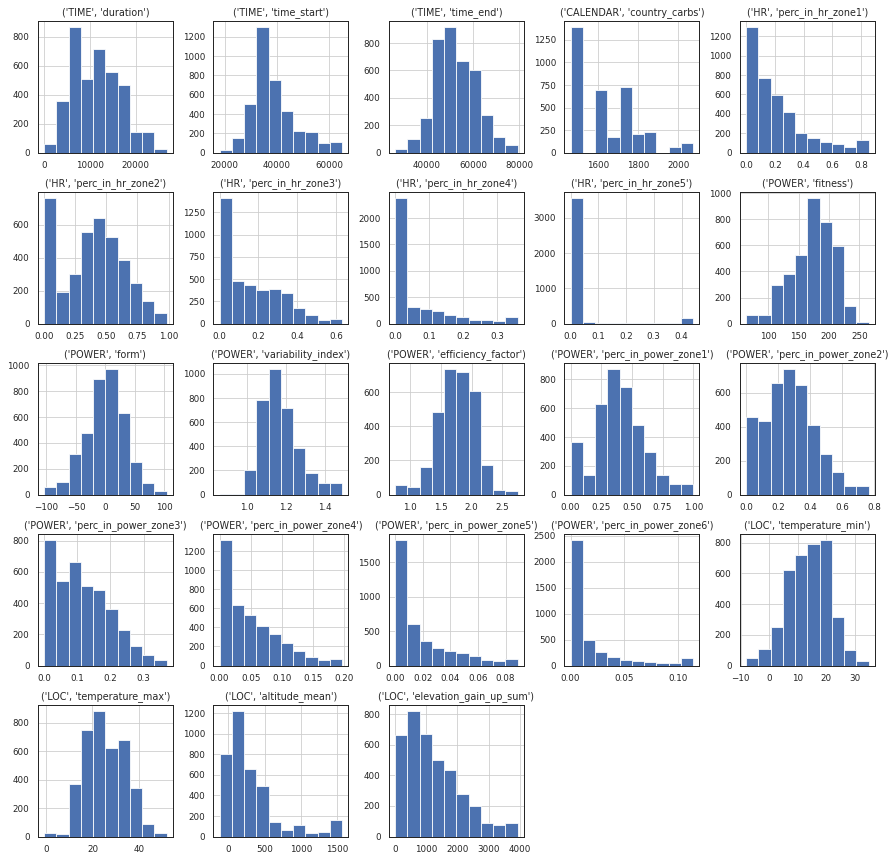

In [23]:
tp_agg.hist(figsize=(15,15)) ; plt.show()

Plot correlations

In [24]:
corr = tp_agg.corr()

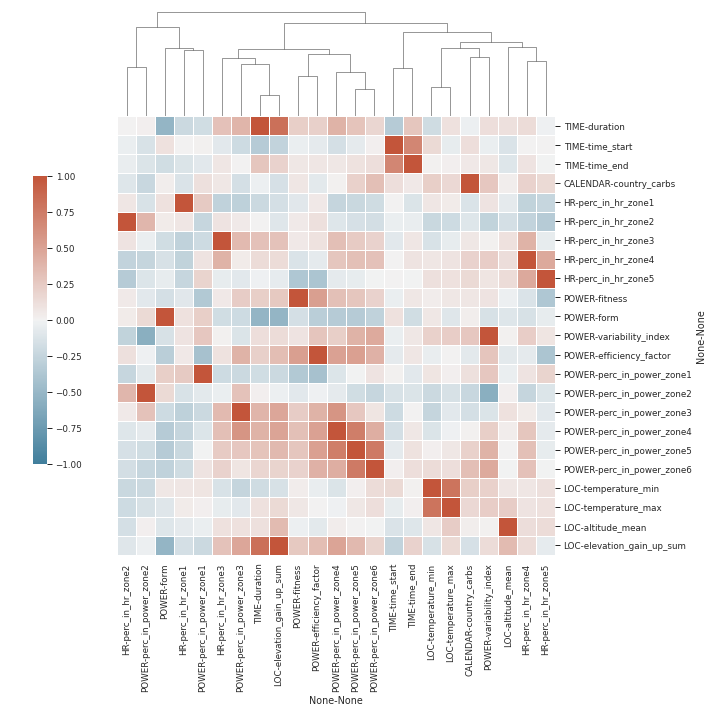

In [25]:
sns.clustermap(corr, vmin=-1, vmax=1, center=0, row_cluster=False, cbar_pos=(0.05, .35, .02, .4),
    linewidths=.5, cmap=sns.diverging_palette(230,20,as_cmap=True))
plt.xlabel('') ; plt.ylabel('') ; plt.show()

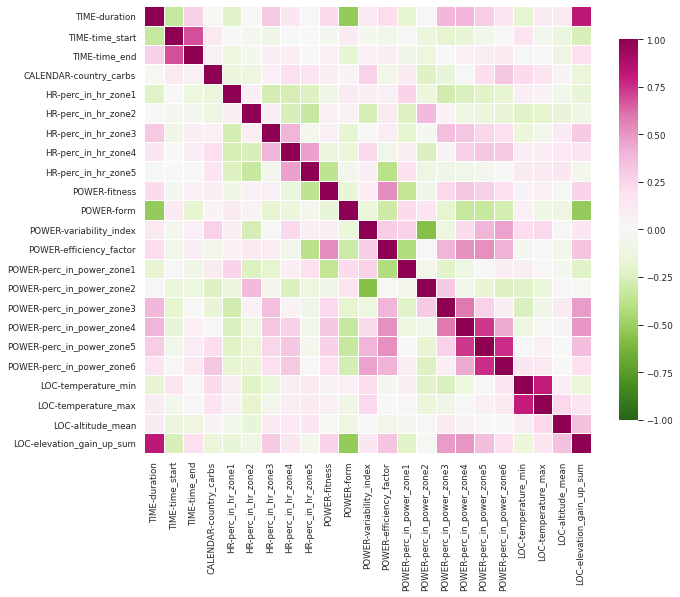

In [26]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(corr, vmin=-1, vmax=1, center=0, cmap='PiYG_r',
            linewidths=.5, cbar_kws=dict(shrink=0.7), square=True)
plt.xlabel('') ; plt.ylabel('') ; plt.show()

Preprocessing pipeline (separate for two data sources)

In [27]:
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold
from sklearn.impute import SimpleImputer
from statsmodels.stats.outliers_influence import variance_inflation_factor

def preprocessing(df):    
    # normalize
    cols_scale = df.columns[(df.dtypes == float) | (df.dtypes == int)]
    scaler = StandardScaler()
    df[cols_scale] = scaler.fit_transform(df[cols_scale])

    # remove features with more than 30% nan
    plt.hist(df.notna().sum() / df.shape[0]) ; plt.axvline(0.3, color='red') ; plt.show()
    print("DROP: features with more than 30% nan: ", df.columns[df.notna().sum() / df.shape[0] < 0.3])
    df = df[df.columns[df.notna().sum() / df.shape[0] >= 0.3]]

    # remove features with low variance
    selector = VarianceThreshold()
    selector.fit(df)
    print("DROP: features with zero variance: ", df.columns[~selector.get_support()])
    df = df.loc[:, selector.get_support()]
    
    # impute variables
    imputer = SimpleImputer()
    df[:] = imputer.fit_transform(df)
    
    # remove multicollinearity with variance inflation factor
    df['const'] = 1
    vif = pd.Series([variance_inflation_factor(df.values, i) for i in range(df.shape[1])], index=df.columns)
    print("DROP: features with high VIF: ", vif[vif > 10])
    df = df[vif.index[vif <= 10]]
    if 'const' in df:
        df = df.drop('const', axis=1)
    return df

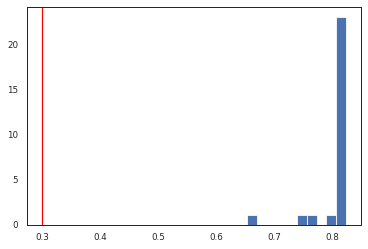

DROP: features with more than 30% nan:  MultiIndex([], )
DROP: features with zero variance:  MultiIndex([], )
DROP: features with high VIF:  Series([], dtype: float64)


/local/home/evanweenen/.local/lib/python3.7/site-packages/pandas/core/generic.py:4150: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


In [28]:
tp_agg = preprocessing(tp_agg)

/local/home/evanweenen/.local/lib/python3.7/site-packages/sklearn/utils/extmath.py:847: RuntimeWarning: invalid value encountered in true_divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/local/home/evanweenen/.local/lib/python3.7/site-packages/sklearn/utils/extmath.py:689: RuntimeWarning: Degrees of freedom <= 0 for slice.
  result = op(x, *args, **kwargs)


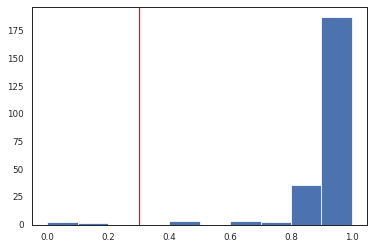

DROP: features with more than 30% nan:  Index(['AUC_3d', 'AUC_7d', 'AUC_14d'], dtype='object')
DROP: features with zero variance:  Index(['hyper_7d', 'hyper_14d'], dtype='object')


/local/home/evanweenen/.local/lib/python3.7/site-packages/statsmodels/stats/outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


DROP: features with high VIF:  time_in_hypo_exercise             inf
time_in_hypoL2_exercise           inf
time_in_hypoL1_exercise           inf
time_in_target_exercise           inf
time_in_hyper_exercise            inf
                              ...    
completeness_14d                  inf
count_14d                         inf
LBGI_14d                   334.680269
HBGI_14d                   587.736571
const                      237.547222
Length: 202, dtype: float64


In [29]:
dc_agg = preprocessing(dc_agg)

In [30]:
dc_agg
# TODO: find out why inf in vif!!!

completeness_exercise  LBGI_exercise  AUC_exercise  \
RIDER date                                                             
1     2018-11-05              -3.166151       2.082416 -1.113618e-16   
      2018-11-06              -1.732047      -0.334540 -1.113618e-16   
      2018-11-07               0.419109       3.331216 -3.663344e-01   
      2018-11-08               0.419109       2.219588 -1.074303e+00   
      2018-11-09               0.419109       0.671035 -4.735987e-01   
...                                 ...            ...           ...   
16    2019-01-22              -0.871585      -0.505526 -1.113618e-16   
      2019-01-23               0.155702       0.043131 -1.113618e-16   
      2019-01-24               0.290039      -0.433978 -1.113618e-16   
      2019-01-25               0.419109       0.739918  1.475177e+00   
      2019-01-26               0.419109      -0.482561  6.323286e-01   

                  hypo_exercise  hyper_exercise  completeness_recovery  \
RIDER date                                                               
1     2018-11-05            1.0             0.0               0.335719   
      2018-11-06            0.0             0.0               0.335719   
      2018-11-07            1.0             1.0               0.335719   
      2018-11-08            1.0             0.0               0.335719   
      2018-11-09            0.0             1.0               0.335719   
...                         ...             ...                    ...   
16    2019-01-22            0.0             1.0              -1.899687   
      2019-01-23            0.0             0.0               0.335719   
      2019-01-24            0.0             1.0               0.335719   
      2019-01-25            1.0             1.0               0.335719   
      2019-01-26            0.0             1.0               0.335719   

                  AUC_recovery  hypo_recovery  hyper_recovery  AUC_sleep  ...  \
RIDER date                                                                ...   
1     2018-11-05 -6.953916e-01            1.0             0.0  -0.135779  ...   
      2018-11-06 -8.410537e-01            1.0             0.0  -0.725241  ...   
      2018-11-07 -4.425481e-01            1.0             0.0  -1.449978  ...   
      2018-11-08 -4.567516e-01            1.0             1.0  -0.131989  ...   
      2018-11-09 -5.501325e-01            1.0             1.0  -1.216938  ...   
...                        ...            ...             ...        ...  ...   
16    2019-01-22 -8.630074e-17            0.0             1.0   0.065893  ...   
      2019-01-23 -3.255872e-02            0.0             1.0   1.924461  ...   
      2019-01-24 -5.331003e-02            0.0             1.0  -0.733867  ...   
      2019-01-25  2.172519e+00            0.0             1.0   0.613399  ...   
      2019-01-26 -3.009154e-01            0.0             1.0  -0.713739  ...   

                       AUC_12h  hypo_12h  hyper_12h        AUC_1d  hypo_1d  \
RIDER date                                                                   
1     2018-11-05  1.209902e-16       1.0        1.0 -1.230732e-16      1.0   
      2018-11-06 -1.300590e+00       1.0        1.0 -1.230732e-16      1.0   
      2018-11-07 -9.398285e-01       1.0        1.0 -1.230732e-16      1.0   
      2018-11-08 -7.775860e-01       1.0        1.0 -1.007129e+00      1.0   
      2018-11-09  1.209902e-16       1.0        1.0 -1.230732e-16      1.0   
...                        ...       ...        ...           ...      ...   
16    2019-01-22  1.209902e-16       0.0        1.0 -1.230732e-16      1.0   
      2019-01-23 -3.480940e-02       1.0        1.0 -1.230732e-16      1.0   
      2019-01-24 -9.578941e-02       1.0        1.0 -1.230732e-16      1.0   
      2019-01-25  3.039932e-01       1.0        1.0  6.139768e-01      1.0   
      2019-01-26  3.284000e-01       0.0        1.0  8.452159e-02      1.0   

                  hyper_1d  hypo_3d  hyper_3d  hy

Merge cycling + glucose data

In [20]:
dc_agg = dc_agg.set_index(['RIDER', 'date'])
dc_agg.columns = pd.MultiIndex.from_product([['GLUCOSE'], dc_agg.columns])
dc_agg = dc_agg.reset_index()

In [21]:
data = pd.merge(tp_agg, dc_agg, on=['RIDER', 'date'], how='inner') # TODO: think about how
data = data.drop('date', axis=1)

/local/home/evanweenen/.local/lib/python3.7/site-packages/pandas/core/generic.py:4150: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


In [22]:
data = data.set_index(['RIDER', ('TIME', 'day_in_season')])
data

TIME CALENDAR                      \
                            duration     race travel race_3d_mean   
RIDER (TIME, day_in_season)                                         
1     0                       7767.0    False  False          0.0   
      1                       8065.0    False  False          0.0   
      2                      11349.0    False  False          0.0   
      3                       7649.0    False  False          0.0   
      4                      11297.0    False  False          0.0   
...                              ...      ...    ...          ...   
16    64                     20746.0    False  False          0.0   
      65                     14070.0    False  False          0.0   
      66                     14277.0    False  False          0.0   
      67                      9109.0    False  False          0.0   
      68                     13628.0    False  False          0.0   

                                                                      \
                            race_7d_mean travel_3d_any travel_7d_any   
RIDER (TIME, day_in_season)                                            
1     0                              0.0         False         False   
      1                              0.0         False         False   
      2                              0.0         False         False   
      3                              0.0         False         False   
      4                              0.0         False         False   
...                                  ...           ...           ...   
16    64                             0.0         False         False   
      65                             0.0         False         False   
      66                             0.0         False         False   
      67                             0.0         False         False   
      68                             0.0         False         False   

                                                       HR                 ...  \
                            country_carbs heart_rate_mean heart_rate_std  ...   
RIDER (TIME, day_in_season)                                               ...   
1     0                           1636.37      166.758017       9.826350  ...   
      1                           1636.37      156.035338       9.833915  ...   
      2                           1636.37      160.294387      12.465518  ...   
      3                           1636.37      147.380180       9.413862  ...   
      4                           1636.37      145.930854      11.180443  ...   
...                                   ...             ...            ...  ...   
16    64                          1461.09      153.288768      20.789021  ...   
      65                          1461.09      135.252261      17.410217  ...   
      66                          1461.09      140.448904      15.881142  ...   
      67                          1461.09      101.404370      16.676031  ...   
      68                          1461.09      140.324919      23.611850  ...   

                                    GLUCOSE                                  \
                            glucose_std_14d glucose_cv_14d glucose_rate_14d   
RIDER (TIME, day_in_season)                                                   
1     0                           56.730797       0.414416       136.893311   
      1                           55.311917       0.414129       133.562129   
      2                           52.317500       0.413757       126.444982   
      3                           52.083887       0.420814       123.769318   
      4                           51.366071       0.423937       121.164479   
...                                     ...            ...              ...   
16    64                          54.756839       0.377368       145.101847   
      65                          57.097125       0.382115       149.424067   
      66                          56.391842       0.

In [38]:
data[cols_select]

TIME                          CALENDAR  \
                            duration time_start time_end travel_7d_any   
RIDER (TIME, day_in_season)                                              
1     0                       7767.0    34453.0  42252.0         False   
      1                       8065.0    33856.0  42684.0         False   
      2                      11349.0    36329.0  53137.0         False   
      3                       7649.0    35558.0  43251.0         False   
      4                      11297.0    40467.0  52232.0         False   
...                              ...        ...      ...           ...   
16    64                     20746.0    35242.0  57228.0         False   
      65                     14070.0    36107.0  50538.0         False   
      66                     14277.0    34487.0  49138.0         False   
      67                      9109.0    37528.0  63896.0         False   
      68                     13628.0    35041.0  50161.0         False   

                                                                       \
                            travel_3d_any travel   race country_carbs   
RIDER (TIME, day_in_season)                                             
1     0                             False  False  False       1636.37   
      1                             False  False  False       1636.37   
      2                             False  False  False       1636.37   
      3                             False  False  False       1636.37   
      4                             False  False  False       1636.37   
...                                   ...    ...    ...           ...   
16    64                            False  False  False       1461.09   
      65                            False  False  False       1461.09   
      66                            False  False  False       1461.09   
      67                            False  False  False       1461.09   
      68                            False  False  False       1461.09   

                                          HR                   ...  \
                            perc_in_hr_zone1 perc_in_hr_zone2  ...   
RIDER (TIME, day_in_season)                                    ...   
1     0                             0.000257         0.066564  ...   
      1                             0.007812         0.169746  ...   
      2                             0.020619         0.132523  ...   
      3                             0.027062         0.440711  ...   
      4                             0.054528         0.414712  ...   
...                                      ...              ...  ...   
16    64                            0.000000         0.007761  ...   
      65                            0.001564         0.047406  ...   
      66                            0.000420         0.020102  ...   
      67                            0.170710         0.394774  ...   
      68                            0.004549         0.079102  ...   

                                    GLUCOSE                                  \
                            glucose_std_14d glucose_cv_14d glucose_rate_14d   
RIDER (TIME, day_in_season)                                                   
1     0                           56.730797       0.414416       136.893311   
      1                           55.311917       0.414129       133.562129   
      2                           52.317500       0.413757       126.444982   
      3                           52.083887       0.420814       123.769318   
      4                           51.366071       0.423937       121.164479   
...                                     ...            ...              ...   
16    64                          54.756839       0.377368       145.101847   
      65                          57.097125       0.382115       149.424067   
      66                          56.391842       0.376038       149.963251   
      67                          52.783259

In [37]:
cols_select += data.columns[data.columns.get_level_values(0) == 'GLUCOSE'].to_list()


TIME                          CALENDAR  \
                            duration time_start time_end travel_7d_any   
RIDER (TIME, day_in_season)                                              
1     0                       7767.0    34453.0  42252.0         False   
      1                       8065.0    33856.0  42684.0         False   
      2                      11349.0    36329.0  53137.0         False   
      3                       7649.0    35558.0  43251.0         False   
      4                      11297.0    40467.0  52232.0         False   
...                              ...        ...      ...           ...   
16    64                     20746.0    35242.0  57228.0         False   
      65                     14070.0    36107.0  50538.0         False   
      66                     14277.0    34487.0  49138.0         False   
      67                      9109.0    37528.0  63896.0         False   
      68                     13628.0    35041.0  50161.0         False   

                                                                       \
                            travel_3d_any travel   race country_carbs   
RIDER (TIME, day_in_season)                                             
1     0                             False  False  False       1636.37   
      1                             False  False  False       1636.37   
      2                             False  False  False       1636.37   
      3                             False  False  False       1636.37   
      4                             False  False  False       1636.37   
...                                   ...    ...    ...           ...   
16    64                            False  False  False       1461.09   
      65                            False  False  False       1461.09   
      66                            False  False  False       1461.09   
      67                            False  False  False       1461.09   
      68                            False  False  False       1461.09   

                                          HR                   ...  \
                            perc_in_hr_zone1 perc_in_hr_zone2  ...   
RIDER (TIME, day_in_season)                                    ...   
1     0                             0.000257         0.066564  ...   
      1                             0.007812         0.169746  ...   
      2                             0.020619         0.132523  ...   
      3                             0.027062         0.440711  ...   
      4                             0.054528         0.414712  ...   
...                                      ...              ...  ...   
16    64                            0.000000         0.007761  ...   
      65                            0.001564         0.047406  ...   
      66                            0.000420         0.020102  ...   
      67                            0.170710         0.394774  ...   
      68                            0.004549         0.079102  ...   

                                    GLUCOSE                                  \
                            glucose_std_14d glucose_cv_14d glucose_rate_14d   
RIDER (TIME, day_in_season)                                                   
1     0                           56.730797       0.414416       136.893311   
      1                           55.311917       0.414129       133.562129   
      2                           52.317500       0.413757       126.444982   
      3                           52.083887       0.420814       123.769318   
      4                           51.366071       0.423937       121.164479   
...                                     ...            ...              ...   
16    64                          54.756839       0.377368       145.101847   
      65                          57.097125       0.382115       149.424067   
      66                          56.391842       0.376038       149.963251   
      67                          52.783259

TIME                          CALENDAR  \
                            duration time_start time_end travel_7d_any   
RIDER (TIME, day_in_season)                                              
1     0                       7767.0    34453.0  42252.0         False   
      1                       8065.0    33856.0  42684.0         False   
      2                      11349.0    36329.0  53137.0         False   
      3                       7649.0    35558.0  43251.0         False   
      4                      11297.0    40467.0  52232.0         False   
...                              ...        ...      ...           ...   
16    64                     20746.0    35242.0  57228.0         False   
      65                     14070.0    36107.0  50538.0         False   
      66                     14277.0    34487.0  49138.0         False   
      67                      9109.0    37528.0  63896.0         False   
      68                     13628.0    35041.0  50161.0         False   

                                                                       \
                            travel_3d_any travel   race country_carbs   
RIDER (TIME, day_in_season)                                             
1     0                             False  False  False       1636.37   
      1                             False  False  False       1636.37   
      2                             False  False  False       1636.37   
      3                             False  False  False       1636.37   
      4                             False  False  False       1636.37   
...                                   ...    ...    ...           ...   
16    64                            False  False  False       1461.09   
      65                            False  False  False       1461.09   
      66                            False  False  False       1461.09   
      67                            False  False  False       1461.09   
      68                            False  False  False       1461.09   

                                          HR                   ...  \
                            perc_in_hr_zone1 perc_in_hr_zone2  ...   
RIDER (TIME, day_in_season)                                    ...   
1     0                             0.000257         0.066564  ...   
      1                             0.007812         0.169746  ...   
      2                             0.020619         0.132523  ...   
      3                             0.027062         0.440711  ...   
      4                             0.054528         0.414712  ...   
...                                      ...              ...  ...   
16    64                            0.000000         0.007761  ...   
      65                            0.001564         0.047406  ...   
      66                            0.000420         0.020102  ...   
      67                            0.170710         0.394774  ...   
      68                            0.004549         0.079102  ...   

                                    GLUCOSE                                  \
                            glucose_std_14d glucose_cv_14d glucose_rate_14d   
RIDER (TIME, day_in_season)                                                   
1     0                           56.730797       0.414416       136.893311   
      1                           55.311917       0.414129       133.562129   
      2                           52.317500       0.413757       126.444982   
      3                           52.083887       0.420814       123.769318   
      4                           51.366071       0.423937       121.164479   
...                                     ...            ...              ...   
16    64                          54.756839       0.377368       145.101847   
      65                          57.097125       0.382115       149.424067   
      66                          56.391842       0.376038       149.963251   
      67                          52.783259

In [34]:
 data.columns[data.columns.get_level_values(0) == 'GLUCOSE'].to_list()

[('GLUCOSE', 'time_in_hypo_exercise'),
 ('GLUCOSE', 'time_in_hypoL2_exercise'),
 ('GLUCOSE', 'time_in_hypoL1_exercise'),
 ('GLUCOSE', 'time_in_target_exercise'),
 ('GLUCOSE', 'time_in_hyper_exercise'),
 ('GLUCOSE', 'time_in_hyperL1_exercise'),
 ('GLUCOSE', 'time_in_hyperL2_exercise'),
 ('GLUCOSE', 'glucose_mean_exercise'),
 ('GLUCOSE', 'glucose_std_exercise'),
 ('GLUCOSE', 'glucose_cv_exercise'),
 ('GLUCOSE', 'glucose_rate_exercise'),
 ('GLUCOSE', 'completeness_exercise'),
 ('GLUCOSE', 'count_exercise'),
 ('GLUCOSE', 'LBGI_exercise'),
 ('GLUCOSE', 'HBGI_exercise'),
 ('GLUCOSE', 'AUC_exercise'),
 ('GLUCOSE', 'hypo_exercise'),
 ('GLUCOSE', 'hyper_exercise'),
 ('GLUCOSE', 'time_in_hypo_recovery'),
 ('GLUCOSE', 'time_in_hypoL2_recovery'),
 ('GLUCOSE', 'time_in_hypoL1_recovery'),
 ('GLUCOSE', 'time_in_target_recovery'),
 ('GLUCOSE', 'time_in_hyper_recovery'),
 ('GLUCOSE', 'time_in_hyperL1_recovery'),
 ('GLUCOSE', 'time_in_hyperL2_recovery'),
 ('GLUCOSE', 'glucose_mean_recovery'),
 ('GLUCOSE

In [237]:
from sklearn.model_selection import LeaveOneGroupOut #TODO
from sklearn.utils import shuffle

In [ ]:

# then: get rid of multilevel index


In [ ]:
# TODO: add glucose cols to cols_select

In [ ]:
#### TODO: TrainingPeaks descriptives

# Also, hypo/hyper in different times for different features
# So merge TP and DC

# Glycaemic control over time
# TSS over time

In [14]:
info = pd.read_csv(DATA_PATH+'./info.csv', index_col=0)
info.set_index('RIDER', inplace=True)
info

,age,diabetes_duration,height,weight,bf(%),HbA1c,FTP,LTHR,HRmax,VO2max
RIDER,,,,,,,,,,
1,22.0,11.0,174.0,60.500000,9.066667,6.7,307.000000,176.333333,192.333333,68.888889
2,30.0,14.0,178.0,71.633333,8.833333,6.6,326.000000,168.666667,181.666667,66.915285
3,26.0,7.0,171.0,66.733333,6.566667,6.8,298.000000,171.000000,180.000000,66.666164
4,19.0,7.0,178.0,78.666667,9.433333,7.8,356.000000,170.333333,187.333333,67.333333
5,25.0,6.0,183.0,69.633333,7.700000,6.5,341.000000,179.666667,192.666667,72.857143
6,20.0,9.0,169.0,56.700000,4.950000,6.4,298.500000,173.000000,184.500000,70.781588
10,27.0,17.0,185.0,75.466667,7.700000,7.3,377.333333,177.000000,194.333333,73.982571
12,30.0,8.0,178.0,64.000000,5.600000,6.0,347.000000,158.333333,178.666667,75.937500
13,34.0,1.0,179.0,60.333333,4.866667,6.3,345.666667,173.000000,182.333333,76.666667


In [27]:
percinlevel = {i:get_percinlevel(df[df.RIDER == i]) for i in ATHLETES}
percinlevel = pd.DataFrame(percinlevel).T
percinlevel['hypo'] = percinlevel['hypo L2'] + percinlevel['hypo L1']
percinlevel['hyper'] = percinlevel['hyper L1'] + percinlevel['hyper L2']
percinlevel

,hypo L2,hypo L1,target,hyper L1,hyper L2,hypo,hyper
1,1.209455,6.730493,64.032547,19.491675,8.535830,7.939947,28.027506
2,3.319630,8.091153,66.078939,14.069814,8.224224,11.410783,22.294038
3,1.387432,4.821754,67.102023,20.653035,6.035756,6.209185,26.688791
4,1.772771,3.610159,57.773782,26.127999,10.715289,5.382930,36.843288
5,0.219195,1.275101,83.175026,13.625436,1.596823,1.494296,15.222259
6,0.450731,2.496993,86.588687,9.486084,0.966444,2.947724,10.452528
10,7.973185,6.257463,47.707133,20.995077,17.065047,14.230648,38.060124
12,2.273402,9.284984,83.716633,4.368628,0.326657,11.558386,4.695285
13,0.018693,0.447523,93.712683,5.647369,0.169333,0.466216,5.816702
14,0.309965,1.706257,62.468134,23.988992,11.309386,2.016222,35.298378


In [28]:
diab = pd.concat([info, percinlevel], axis=1)
diab

,age,diabetes_duration,height,weight,bf(%),HbA1c,FTP,LTHR,HRmax,VO2max,hypo L2,hypo L1,target,hyper L1,hyper L2,hypo,hyper
1,22.0,11.0,174.0,60.500000,9.066667,6.7,307.000000,176.333333,192.333333,68.888889,1.209455,6.730493,64.032547,19.491675,8.535830,7.939947,28.027506
2,30.0,14.0,178.0,71.633333,8.833333,6.6,326.000000,168.666667,181.666667,66.915285,3.319630,8.091153,66.078939,14.069814,8.224224,11.410783,22.294038
3,26.0,7.0,171.0,66.733333,6.566667,6.8,298.000000,171.000000,180.000000,66.666164,1.387432,4.821754,67.102023,20.653035,6.035756,6.209185,26.688791
4,19.0,7.0,178.0,78.666667,9.433333,7.8,356.000000,170.333333,187.333333,67.333333,1.772771,3.610159,57.773782,26.127999,10.715289,5.382930,36.843288
5,25.0,6.0,183.0,69.633333,7.700000,6.5,341.000000,179.666667,192.666667,72.857143,0.219195,1.275101,83.175026,13.625436,1.596823,1.494296,15.222259
6,20.0,9.0,169.0,56.700000,4.950000,6.4,298.500000,173.000000,184.500000,70.781588,0.450731,2.496993,86.588687,9.486084,0.966444,2.947724,10.452528
10,27.0,17.0,185.0,75.466667,7.700000,7.3,377.333333,177.000000,194.333333,73.982571,7.973185,6.257463,47.707133,20.995077,17.065047,14.230648,38.060124
12,30.0,8.0,178.0,64.000000,5.600000,6.0,347.000000,158.333333,178.666667,75.937500,2.273402,9.284984,83.716633,4.368628,0.326657,11.558386,4.695285
13,34.0,1.0,179.0,60.333333,4.866667,6.3,345.666667,173.000000,182.333333,76.666667,0.018693,0.447523,93.712683,5.647369,0.169333,0.466216,5.816702
14,27.0,17.0,187.0,75.166667,9.333333,7.1,348.000000,169.000000,189.500000,66.500000,0.309965,1.706257,62.468134,23.988992,11.309386,2.016222,35.298378


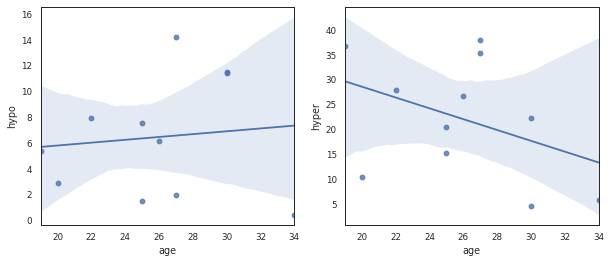

In [34]:
fig, axs = plt.subplots(1,2, figsize=(10,4))
sns.regplot(x='age', y='hypo', data=diab, ax=axs[0])
sns.regplot(x='age', y='hyper', data=diab, ax=axs[1])
plt.show()

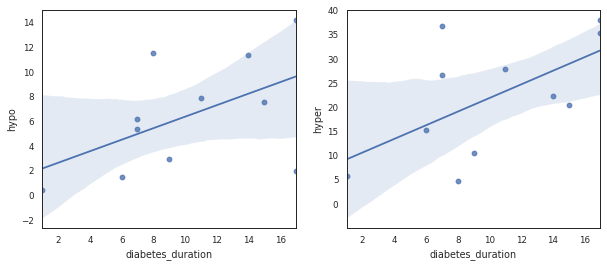

In [37]:
fig, axs = plt.subplots(1,2, figsize=(10,4))
sns.regplot(x='diabetes_duration', y='hypo', data=diab, ax=axs[0])
sns.regplot(x='diabetes_duration', y='hyper', data=diab, ax=axs[1])
plt.show()

In [39]:
import statsmodels.api as sm

diab = sm.add_constant(diab)

model = sm.OLS(diab['hypo'], diab[info.columns])
res = model.fit()
print(res.summary())

model = sm.OLS(diab['hyper'], diab[info.columns])
res = model.fit()
print(res.summary())

                                 OLS Regression Results                                
Dep. Variable:                   hypo   R-squared (uncentered):                   0.987
Model:                            OLS   Adj. R-squared (uncentered):              0.858
Method:                 Least Squares   F-statistic:                              7.657
Date:                Tue, 26 Oct 2021   Prob (F-statistic):                       0.275
Time:                        21:19:31   Log-Likelihood:                         -14.273
No. Observations:                  11   AIC:                                      48.55
Df Residuals:                       1   BIC:                                      52.53
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
                        coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------

/local/home/evanweenen/.local/lib/python3.7/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  "anyway, n=%i" % int(n))
/local/home/evanweenen/.local/lib/python3.7/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  "anyway, n=%i" % int(n))


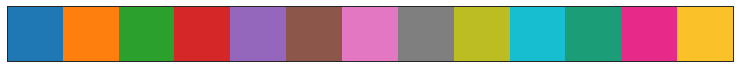

In [196]:
sns.palplot(sns.color_palette('tab10')+[sns.color_palette('Dark2')[0],
                                        sns.color_palette('Dark2')[3],
                                        sns.color_palette('inferno')[-1],
                                        sns.color_palette('inferno')])

In [201]:
sns.color_palette('YlGnBu', n_colors=7)

[(0.9288273740868896, 0.972318339100346, 0.6941637831603229),
 (0.7781776239907728, 0.9128642829680892, 0.7060976547481739),
 (0.4951787773933103, 0.8028604382929643, 0.733748558246828),
 (0.2526874279123414, 0.7114494425221068, 0.7683813917723953),
 (0.11410995770857363, 0.5647058823529412, 0.7510957324106113),
 (0.13361014994232986, 0.3647520184544406, 0.6569780853517878),
 (0.1419761630142253, 0.20144559784698193, 0.5739331026528259)]

In [198]:
sns.color_palette('inferno', n_colors=7)

[(0.129285, 0.047293, 0.290788),
 (0.3415, 0.062325, 0.429425),
 (0.54092, 0.134729, 0.415123),
 (0.735683, 0.215906, 0.330245),
 (0.894305, 0.353399, 0.193584),
 (0.978422, 0.557937, 0.034931),
 (0.974638, 0.797692, 0.206332)]

In [205]:
sns.color_palette('gist_earth_r', n_colors=7)

[(0.8518382084467404, 0.7103140233308513, 0.6171058037787064),
 (0.7389241598191383, 0.6730376114081996, 0.3849495081644698),
 (0.5947984998026056, 0.6844241296518607, 0.3452878910092465),
 (0.35862242511195164, 0.6261367892976589, 0.2930678846538615),
 (0.23071926548397137, 0.5538959866220736, 0.39004938240081705),
 (0.16464755874020998, 0.44614578142248856, 0.49399353175533156),
 (0.08101705271343665, 0.2137804600164292, 0.4712453089602375)]

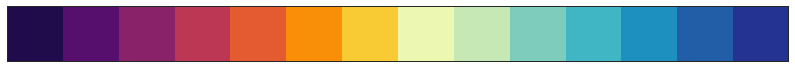

In [202]:
sns.palplot(sns.color_palette('inferno', n_colors=7)+sns.color_palette('YlGnBu', n_colors=7))

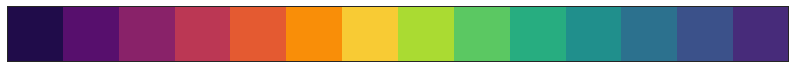

In [212]:
sns.palplot(sns.color_palette('inferno', n_colors=7)+sns.color_palette('viridis_r', n_colors=7))

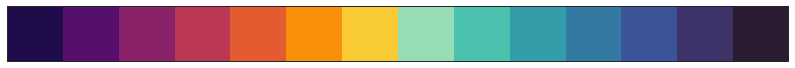

In [208]:
sns.palplot(sns.color_palette('inferno', n_colors=7)+sns.color_palette('mako_r', n_colors=7))

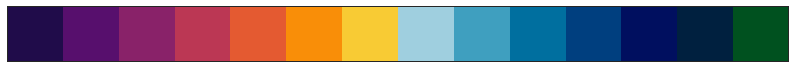

In [210]:
sns.palplot(sns.color_palette('inferno', n_colors=7)+sns.color_palette('ocean_r', n_colors=7))

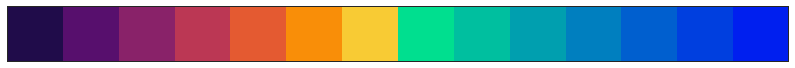

In [215]:
sns.palplot(sns.color_palette('inferno', n_colors=7)+sns.color_palette('winter_r', n_colors=7))

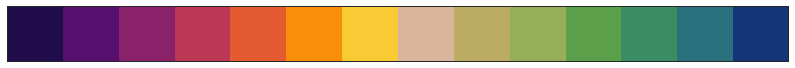

In [206]:
sns.palplot(sns.color_palette('inferno', n_colors=7)+sns.color_palette('gist_earth_r', n_colors=7))

In [189]:
sns.color_palette('tab20b')

[(0.2235294117647059, 0.23137254901960785, 0.4745098039215686),
 (0.3215686274509804, 0.32941176470588235, 0.6392156862745098),
 (0.4196078431372549, 0.43137254901960786, 0.8117647058823529),
 (0.611764705882353, 0.6196078431372549, 0.8705882352941177),
 (0.38823529411764707, 0.4745098039215686, 0.2235294117647059),
 (0.5490196078431373, 0.6352941176470588, 0.3215686274509804),
 (0.7098039215686275, 0.8117647058823529, 0.4196078431372549),
 (0.807843137254902, 0.8588235294117647, 0.611764705882353),
 (0.5490196078431373, 0.42745098039215684, 0.19215686274509805),
 (0.7411764705882353, 0.6196078431372549, 0.2235294117647059),
 (0.9058823529411765, 0.7294117647058823, 0.3215686274509804),
 (0.9058823529411765, 0.796078431372549, 0.5803921568627451),
 (0.5176470588235295, 0.23529411764705882, 0.2235294117647059),
 (0.6784313725490196, 0.28627450980392155, 0.2901960784313726),
 (0.8392156862745098, 0.3803921568627451, 0.4196078431372549),
 (0.9058823529411765, 0.5882352941176471, 0.611764705882353),
 (0.4823529411764706, 0.2549019607843137, 0.45098039215686275),
 (0.6470588235294118, 0.3176470588235294, 0.5803921568627451),
 (0.807843137254902, 0.42745098039215684, 0.7411764705882353),
 (0.8705882352941177, 0.6196078431372549, 0.8392156862745098)]

In [170]:
sns.color_palette('tab10')

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]

In [171]:
sns.color_palette('Dark2')

[(0.10588235294117647, 0.6196078431372549, 0.4666666666666667),
 (0.8509803921568627, 0.37254901960784315, 0.00784313725490196),
 (0.4588235294117647, 0.4392156862745098, 0.7019607843137254),
 (0.9058823529411765, 0.1607843137254902, 0.5411764705882353),
 (0.4, 0.6509803921568628, 0.11764705882352941),
 (0.9019607843137255, 0.6705882352941176, 0.00784313725490196),
 (0.6509803921568628, 0.4627450980392157, 0.11372549019607843),
 (0.4, 0.4, 0.4)]

In [172]:
sns.color_palette('gist_stern')

[(0.5691674045962472, 0.1411764705882353, 0.2823529411764706),
 (0.28627450980392155, 0.28627450980392155, 0.5725490196078431),
 (0.42745098039215684, 0.42745098039215684, 0.8549019607843137),
 (0.5725490196078431, 0.5725490196078431, 0.6912807676261994),
 (0.7137254901960784, 0.7137254901960784, 0.09052982895285744),
 (0.8588235294117648, 0.8588235294117647, 0.4672586015538292)]

In [169]:
sns.color_palette('brg')

[(0.2823529411764706, 0.0, 0.7176470588235294),
 (0.5725490196078431, 0.0, 0.4274509803921569),
 (0.8549019607843137, 0.0, 0.14509803921568631),
 (0.8549019607843137, 0.1450980392156863, 0.0),
 (0.5725490196078431, 0.42745098039215684, 0.0),
 (0.2823529411764706, 0.7176470588235294, 0.0)]

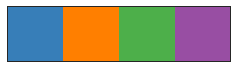

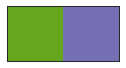

In [234]:
sns.palplot(color_sec.values()) ; plt.show()

sns.palplot([sns.color_palette('Dark2')[4], sns.color_palette('Dark2')[2]]) ; plt.show()

In [2]:
import seaborn as sns
sns.color_palette('colorblind')

[(0.00392156862745098, 0.45098039215686275, 0.6980392156862745),
 (0.8705882352941177, 0.5607843137254902, 0.0196078431372549),
 (0.00784313725490196, 0.6196078431372549, 0.45098039215686275),
 (0.8352941176470589, 0.3686274509803922, 0.0),
 (0.8, 0.47058823529411764, 0.7372549019607844),
 (0.792156862745098, 0.5686274509803921, 0.3803921568627451),
 (0.984313725490196, 0.6862745098039216, 0.8941176470588236),
 (0.5803921568627451, 0.5803921568627451, 0.5803921568627451),
 (0.9254901960784314, 0.8823529411764706, 0.2),
 (0.33725490196078434, 0.7058823529411765, 0.9137254901960784)]

In [3]:
sns.color_palette('Set1')

[(0.8941176470588236, 0.10196078431372549, 0.10980392156862745),
 (0.21568627450980393, 0.49411764705882355, 0.7215686274509804),
 (0.30196078431372547, 0.6862745098039216, 0.2901960784313726),
 (0.596078431372549, 0.3058823529411765, 0.6392156862745098),
 (1.0, 0.4980392156862745, 0.0),
 (1.0, 1.0, 0.2),
 (0.6509803921568628, 0.33725490196078434, 0.1568627450980392),
 (0.9686274509803922, 0.5058823529411764, 0.7490196078431373),
 (0.6, 0.6, 0.6)]

In [10]:
from plot import palette_ath

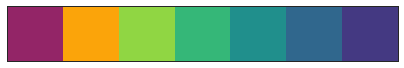

In [48]:
sns.palplot(sns.color_palette('inferno', n_colors=4)[1::2]+sns.color_palette('viridis_r', n_colors=5))

In [141]:
sns.color_palette('Set2')

[(0.4, 0.7607843137254902, 0.6470588235294118),
 (0.9882352941176471, 0.5529411764705883, 0.3843137254901961),
 (0.5529411764705883, 0.6274509803921569, 0.796078431372549),
 (0.9058823529411765, 0.5411764705882353, 0.7647058823529411),
 (0.6509803921568628, 0.8470588235294118, 0.32941176470588235),
 (1.0, 0.8509803921568627, 0.1843137254901961),
 (0.8980392156862745, 0.7686274509803922, 0.5803921568627451),
 (0.7019607843137254, 0.7019607843137254, 0.7019607843137254)]

In [142]:
sns.color_palette('Set3')

[(0.5529411764705883, 0.8274509803921568, 0.7803921568627451),
 (1.0, 1.0, 0.7019607843137254),
 (0.7450980392156863, 0.7294117647058823, 0.8549019607843137),
 (0.984313725490196, 0.5019607843137255, 0.4470588235294118),
 (0.5019607843137255, 0.6941176470588235, 0.8274509803921568),
 (0.9921568627450981, 0.7058823529411765, 0.3843137254901961),
 (0.7019607843137254, 0.8705882352941177, 0.4117647058823529),
 (0.9882352941176471, 0.803921568627451, 0.8980392156862745),
 (0.8509803921568627, 0.8509803921568627, 0.8509803921568627),
 (0.7372549019607844, 0.5019607843137255, 0.7411764705882353),
 (0.8, 0.9215686274509803, 0.7725490196078432),
 (1.0, 0.9294117647058824, 0.43529411764705883)]

In [144]:
sns.color_palette('Set1')

[(0.8941176470588236, 0.10196078431372549, 0.10980392156862745),
 (0.21568627450980393, 0.49411764705882355, 0.7215686274509804),
 (0.30196078431372547, 0.6862745098039216, 0.2901960784313726),
 (0.596078431372549, 0.3058823529411765, 0.6392156862745098),
 (1.0, 0.4980392156862745, 0.0),
 (1.0, 1.0, 0.2),
 (0.6509803921568628, 0.33725490196078434, 0.1568627450980392),
 (0.9686274509803922, 0.5058823529411764, 0.7490196078431373),
 (0.6, 0.6, 0.6)]

In [117]:
sns.color_palette('tab10')

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]

In [145]:
sns.color_palette('tab20', n_colors=14)

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (0.6823529411764706, 0.7803921568627451, 0.9098039215686274),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (1.0, 0.7333333333333333, 0.47058823529411764),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.596078431372549, 0.8745098039215686, 0.5411764705882353),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (1.0, 0.596078431372549, 0.5882352941176471),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.7725490196078432, 0.6901960784313725, 0.8352941176470589),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.7686274509803922, 0.611764705882353, 0.5803921568627451),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.9686274509803922, 0.7137254901960784, 0.8235294117647058)]

In [147]:
sns.color_palette('tab20b')

[(0.2235294117647059, 0.23137254901960785, 0.4745098039215686),
 (0.3215686274509804, 0.32941176470588235, 0.6392156862745098),
 (0.4196078431372549, 0.43137254901960786, 0.8117647058823529),
 (0.611764705882353, 0.6196078431372549, 0.8705882352941177),
 (0.38823529411764707, 0.4745098039215686, 0.2235294117647059),
 (0.5490196078431373, 0.6352941176470588, 0.3215686274509804),
 (0.7098039215686275, 0.8117647058823529, 0.4196078431372549),
 (0.807843137254902, 0.8588235294117647, 0.611764705882353),
 (0.5490196078431373, 0.42745098039215684, 0.19215686274509805),
 (0.7411764705882353, 0.6196078431372549, 0.2235294117647059),
 (0.9058823529411765, 0.7294117647058823, 0.3215686274509804),
 (0.9058823529411765, 0.796078431372549, 0.5803921568627451),
 (0.5176470588235295, 0.23529411764705882, 0.2235294117647059),
 (0.6784313725490196, 0.28627450980392155, 0.2901960784313726),
 (0.8392156862745098, 0.3803921568627451, 0.4196078431372549),
 (0.9058823529411765, 0.5882352941176471, 0.611764705882353),
 (0.4823529411764706, 0.2549019607843137, 0.45098039215686275),
 (0.6470588235294118, 0.3176470588235294, 0.5803921568627451),
 (0.807843137254902, 0.42745098039215684, 0.7411764705882353),
 (0.8705882352941177, 0.6196078431372549, 0.8392156862745098)]

In [148]:
sns.color_palette('tab20c')

[(0.19215686274509805, 0.5098039215686274, 0.7411764705882353),
 (0.4196078431372549, 0.6823529411764706, 0.8392156862745098),
 (0.6196078431372549, 0.792156862745098, 0.8823529411764706),
 (0.7764705882352941, 0.8588235294117647, 0.9372549019607843),
 (0.9019607843137255, 0.3333333333333333, 0.050980392156862744),
 (0.9921568627450981, 0.5529411764705883, 0.23529411764705882),
 (0.9921568627450981, 0.6823529411764706, 0.4196078431372549),
 (0.9921568627450981, 0.8156862745098039, 0.6352941176470588),
 (0.19215686274509805, 0.6392156862745098, 0.32941176470588235),
 (0.4549019607843137, 0.7686274509803922, 0.4627450980392157),
 (0.6313725490196078, 0.8509803921568627, 0.6078431372549019),
 (0.7803921568627451, 0.9137254901960784, 0.7529411764705882),
 (0.4588235294117647, 0.4196078431372549, 0.6941176470588235),
 (0.6196078431372549, 0.6039215686274509, 0.7843137254901961)]

In [149]:
sns.color_palette('Paired')

[(0.6509803921568628, 0.807843137254902, 0.8901960784313725),
 (0.12156862745098039, 0.47058823529411764, 0.7058823529411765),
 (0.6980392156862745, 0.8745098039215686, 0.5411764705882353),
 (0.2, 0.6274509803921569, 0.17254901960784313),
 (0.984313725490196, 0.6039215686274509, 0.6),
 (0.8901960784313725, 0.10196078431372549, 0.10980392156862745),
 (0.9921568627450981, 0.7490196078431373, 0.43529411764705883),
 (1.0, 0.4980392156862745, 0.0),
 (0.792156862745098, 0.6980392156862745, 0.8392156862745098),
 (0.41568627450980394, 0.23921568627450981, 0.6039215686274509),
 (1.0, 1.0, 0.6),
 (0.6941176470588235, 0.34901960784313724, 0.1568627450980392),
 (0.6509803921568628, 0.807843137254902, 0.8901960784313725),
 (0.12156862745098039, 0.47058823529411764, 0.7058823529411765)]

In [159]:
sns.color_palette('Dark2')

[(0.10588235294117647, 0.6196078431372549, 0.4666666666666667),
 (0.8509803921568627, 0.37254901960784315, 0.00784313725490196),
 (0.4588235294117647, 0.4392156862745098, 0.7019607843137254),
 (0.9058823529411765, 0.1607843137254902, 0.5411764705882353),
 (0.4, 0.6509803921568628, 0.11764705882352941),
 (0.9019607843137255, 0.6705882352941176, 0.00784313725490196),
 (0.6509803921568628, 0.4627450980392157, 0.11372549019607843),
 (0.4, 0.4, 0.4)]

In [203]:
sns.color_palette('gist_stern', n_colors=14)

[(0.9403811230585424, 0.06666666666666667, 0.13333333333333333),
 (0.6082425328554361, 0.13333333333333333, 0.26666666666666666),
 (0.27610394265232974, 0.2, 0.4),
 (0.26666666666666666, 0.26666666666666666, 0.5333333333333333),
 (0.3333333333333333, 0.3333333333333333, 0.6666666666666666),
 (0.4, 0.4, 0.8),
 (0.4666666666666667, 0.4666666666666667, 0.9333333333333333),
 (0.5333333333333333, 0.5333333333333333, 0.8581560283687943),
 (0.6, 0.6, 0.5744680851063828),
 (0.6666666666666667, 0.6666666666666666, 0.2907801418439714),
 (0.7333333333333334, 0.7333333333333333, 0.007092198581559961),
 (0.7999999999999999, 0.8, 0.24528301886792472),
 (0.8666666666666667, 0.8666666666666667, 0.4968553459119498),
 (0.9333333333333333, 0.9333333333333333, 0.7484276729559749)]

In [168]:
sns.color_palette('brg')

[(0.2823529411764706, 0.0, 0.7176470588235294),
 (0.5725490196078431, 0.0, 0.4274509803921569),
 (0.8549019607843137, 0.0, 0.14509803921568631),
 (0.8549019607843137, 0.1450980392156863, 0.0),
 (0.5725490196078431, 0.42745098039215684, 0.0),
 (0.2823529411764706, 0.7176470588235294, 0.0)]

In [162]:
sns.color_palette('CMRmap')

[(0.16941176470588235, 0.15, 0.5323529411764706),
 (0.3870588235294118, 0.16450980392156864, 0.6774509803921569),
 (0.7678431372549019, 0.22098039215686274, 0.3531372549019608),
 (0.9419607843137255, 0.3950980392156863, 0.06294117647058822),
 (0.9, 0.6774509803921569, 0.07098039215686275),
 (0.9, 0.8805882352941177, 0.44823529411764707)]

In [163]:
sns.color_palette('Spectral')

[(0.8853517877739331, 0.3190311418685121, 0.29042675893886966),
 (0.9873125720876587, 0.6473663975394078, 0.3642445213379469),
 (0.9971549404075356, 0.9118031526336025, 0.6010765090349866),
 (0.9288735101883892, 0.9715494040753557, 0.6380622837370243),
 (0.6334486735870821, 0.8521337946943485, 0.6436755094194541),
 (0.2800461361014994, 0.6269896193771626, 0.7024221453287197)]

In [164]:
sns.color_palette('RdYlBu')

[(0.8899653979238754, 0.2867358708189158, 0.19815455594002307),
 (0.9873125720876587, 0.6473663975394078, 0.3642445213379469),
 (0.9971549404075356, 0.9118031526336025, 0.6153018069973087),
 (0.9118031526336026, 0.9658592848904267, 0.9111880046136099),
 (0.6409842368319879, 0.8272971933871589, 0.90080738177624),
 (0.346482122260669, 0.5492502883506344, 0.7527104959630911)]

In [165]:
sns.color_palette('plasma')

[(0.32515, 0.006915, 0.639512),
 (0.546157, 0.038954, 0.64701),
 (0.723444, 0.196158, 0.538981),
 (0.85975, 0.360588, 0.406917),
 (0.95547, 0.533093, 0.28549),
 (0.994495, 0.74088, 0.166335)]

In [166]:
sns.color_palette('inferno')

[(0.15585, 0.044559, 0.325338),
 (0.397674, 0.083257, 0.433183),
 (0.621685, 0.164184, 0.388781),
 (0.832299, 0.283913, 0.257383),
 (0.961293, 0.488716, 0.084289),
 (0.981173, 0.759135, 0.156863)]

In [167]:
sns.color_palette('rocket')

[(0.20973515, 0.09747934, 0.24238489),
 (0.43860848, 0.12177004, 0.34119475),
 (0.67824099, 0.09192342, 0.3504148),
 (0.8833417, 0.19830556, 0.26014181),
 (0.95381595, 0.46373781, 0.31769923),
 (0.96516917, 0.70776351, 0.5606593)]